In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [20]:
data = pd.read_csv("Transaksii_Petshop.csv")
data

,ID Transaksi,Tanggal Transaksi,Metode Pembayaran,Nama Barang 1,Kategori Barang 1,Jumlah Barang Dibeli 1,Harga Barang 1,Nama Barang 2,Kategori Barang 2,Jumlah Barang Dibeli 2,...,Harga Barang 3,Nama Barang 4,Kategori Barang 4,Jumlah Barang Dibeli 4,Harga Barang 4,Nama Barang 5,Kategori Barang 5,Jumlah Barang Dibeli 5,Harga Barang 5,Total Harga Transaksi
0,AgPeeLTL,2024-03-02,Cash,Life Cat Pouch Dus,Makanan Kucing,7,108000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,1,...,20000.0,Life Cat Tofu - Macha,Makanan Kucing,4.0,55833.0,Life Cat Tofu - Mango,Makanan Kucing,1.0,55833.0,1219665
1,X3ih6KPj,2024-09-19,Transfer Bank,Life Cat Pouch Dus,Makanan Kucing,7,108000,Makanan Anjing Purina,Makanan Anjing,2,...,4435.0,Makanan Kucing Whiskas,Makanan Kucing,7.0,45000.0,Life Cat Can - Chicken & Salmon,Makanan Kucing,10.0,12000.0,1308740
2,yJhNjYUP,2024-06-15,Cash,Makanan Anjing Purina,Makanan Anjing,5,50000,Life Cat Pouch - Salmon Adult,Makanan Kucing,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272265
3,JSEmCzSj,2024-05-25,Transfer Bank,Makanan Ikan Gupi,Makanan Ikan,4,35000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,6,...,4435.0,Life Cat Can - Kitten Tuna,Makanan Kucing,8.0,12000.0,Mainan Anjing Kong,Mainan Anjing,1.0,20000.0,305175
4,31sF5GKo,2024-02-27,Transfer Bank,Life Cat Can - Kitten Tuna,Makanan Kucing,7,12000,Mainan Anjing Kong,Mainan Anjing,4,...,12024.0,Life Cat Can - Tuna,Makanan Kucing,6.0,11000.0,Life Cat Pouch - Salmon Adult,Makanan Kucing,9.0,4453.0,378293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,S4tG3KjI,2024-01-17,Cash,Life Cat Pouch - Chicken adult,Makanan Kucing,4,4435,Makanan Ikan Gupi,Makanan Ikan,4,...,50000.0,Life Cat Can - Tuna,Makanan Kucing,7.0,11000.0,Life Cat Pouch - Salmon Adult,Makanan Kucing,1.0,4453.0,739193
1096,QbpLQaP8,2024-03-11,Transfer Bank,Life Cat Pouch - Kitten Tuna,Makanan Kucing,5,4435,Life Cat Pouch Dus,Makanan Kucing,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454175
1097,OIdoJEh1,2024-04-15,QRIS,Life Cat Can - Chicken & Salmon,Makanan Kucing,10,12000,Life Cat Can - Kitten Tuna,Makanan Kucing,7,...,4435.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248350
1098,FEh4WalY,2024-07-18,Transfer Bank,Makanan Kucing Whiskas,Makanan Kucing,2,45000,Makanan Ikan Gupi,Makanan Ikan,3,...,55833.0,Life Cat Tofu - Mango,Makanan Kucing,7.0,55833.0,Life Cat Can - Kitten Salmon,Makanan Kucing,1.0,12024.0,653688


EKSPLORASI DATA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Transaksi            1100 non-null   object 
 1   Tanggal Transaksi       1100 non-null   object 
 2   Metode Pembayaran       1100 non-null   object 
 3   Nama Barang 1           1100 non-null   object 
 4   Kategori Barang 1       1100 non-null   object 
 5   Jumlah Barang Dibeli 1  1100 non-null   int64  
 6   Harga Barang 1          1100 non-null   int64  
 7   Nama Barang 2           1100 non-null   object 
 8   Kategori Barang 2       1100 non-null   object 
 9   Jumlah Barang Dibeli 2  1100 non-null   int64  
 10  Harga Barang 2          1100 non-null   int64  
 11  Nama Barang 3           825 non-null    object 
 12  Kategori Barang 3       825 non-null    object 
 13  Jumlah Barang Dibeli 3  825 non-null    float64
 14  Harga Barang 3          825 non-null    

In [5]:
data.describe()

,Jumlah Barang Dibeli 1,Harga Barang 1,Jumlah Barang Dibeli 2,Harga Barang 2,Jumlah Barang Dibeli 3,Harga Barang 3,Jumlah Barang Dibeli 4,Harga Barang 4,Jumlah Barang Dibeli 5,Harga Barang 5,Total Harga Transaksi
count,1100.000000,1100.000000,1100.000000,1100.000000,825.000000,825.000000,563.000000,563.000000,287.000000,287.000000,1.100000e+03
mean,5.557273,27788.870909,5.522727,26952.694545,5.490909,26997.431515,5.321492,28147.468917,5.397213,28435.313589,5.237158e+05
std,2.907333,28796.449580,2.810424,26687.787351,2.896722,26948.484414,2.872377,27341.663911,2.938006,29748.850846,3.660114e+05
min,1.000000,4435.000000,1.000000,4435.000000,1.000000,4435.000000,1.000000,4435.000000,1.000000,4435.000000,1.343500e+04
25%,3.000000,4500.000000,3.000000,4500.000000,3.000000,4453.000000,3.000000,4500.000000,3.000000,4500.000000,2.396445e+05
50%,6.000000,12024.000000,5.500000,12024.000000,6.000000,12024.000000,5.000000,12024.000000,5.000000,12024.000000,4.487500e+05
75%,8.000000,45000.000000,8.000000,45000.000000,8.000000,45000.000000,8.000000,50000.000000,8.000000,45000.000000,7.241692e+05
max,10.000000,108000.000000,10.000000,108000.000000,10.000000,108000.000000,10.000000,108000.000000,10.000000,108000.000000,2.126915e+06


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

ID Transaksi                0
Tanggal Transaksi           0
Metode Pembayaran           0
Nama Barang 1               0
Kategori Barang 1           0
Jumlah Barang Dibeli 1      0
Harga Barang 1              0
Nama Barang 2               0
Kategori Barang 2           0
Jumlah Barang Dibeli 2      0
Harga Barang 2              0
Nama Barang 3             275
Kategori Barang 3         275
Jumlah Barang Dibeli 3    275
Harga Barang 3            275
Nama Barang 4             537
Kategori Barang 4         537
Jumlah Barang Dibeli 4    537
Harga Barang 4            537
Nama Barang 5             813
Kategori Barang 5         813
Jumlah Barang Dibeli 5    813
Harga Barang 5            813
Total Harga Transaksi       0
dtype: int64

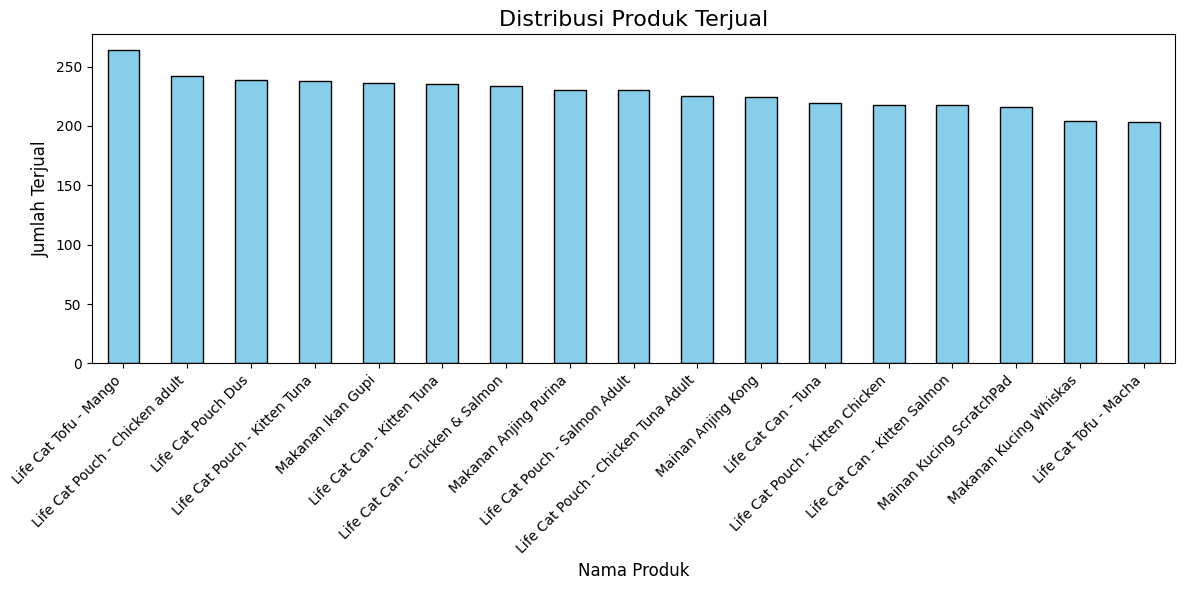

In [8]:
# Combine all product columns into a single series
all_products = pd.concat([data['Nama Barang 1'], data['Nama Barang 2'], data['Nama Barang 3'], data['Nama Barang 4'],data['Nama Barang 5']])
product_counts = all_products.value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Produk Terjual', fontsize=16)
plt.xlabel('Nama Produk', fontsize=12)
plt.ylabel('Jumlah Terjual', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


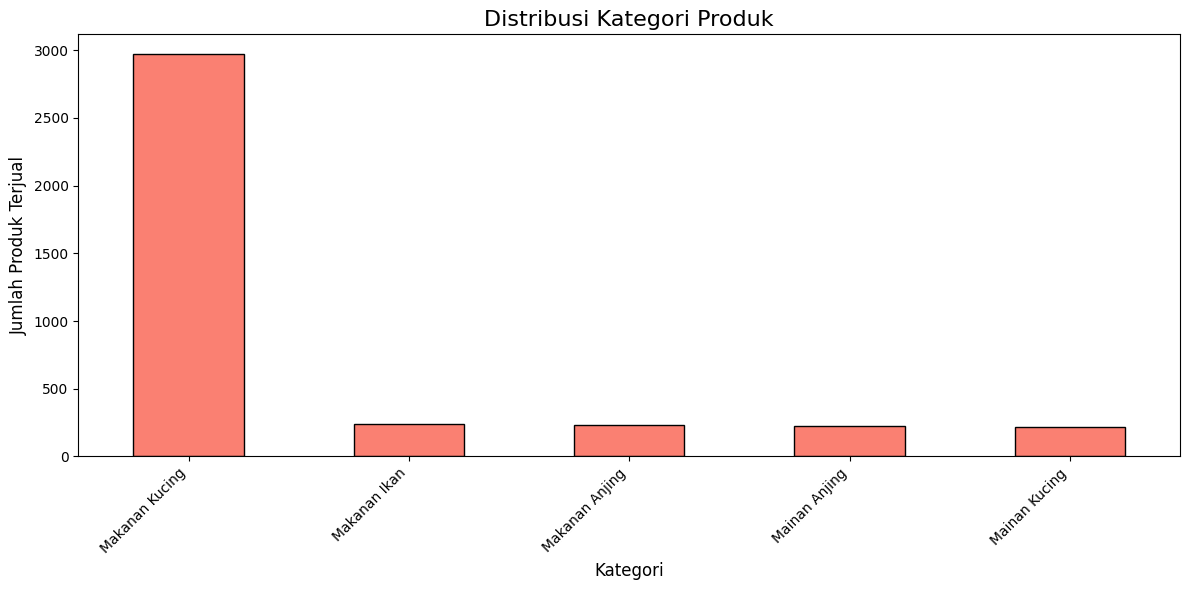

In [9]:
# Combine all category columns into a single series
all_categories = pd.concat([data['Kategori Barang 1'], data['Kategori Barang 2'], data['Kategori Barang 3'], data['Kategori Barang 4'],data['Kategori Barang 5']])
category_counts = all_categories.value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribusi Kategori Produk', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Produk Terjual', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_26456\3881359105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Metode Pembayaran'], palette="viridis", order=data['Metode Pembayaran'].value_counts().index)


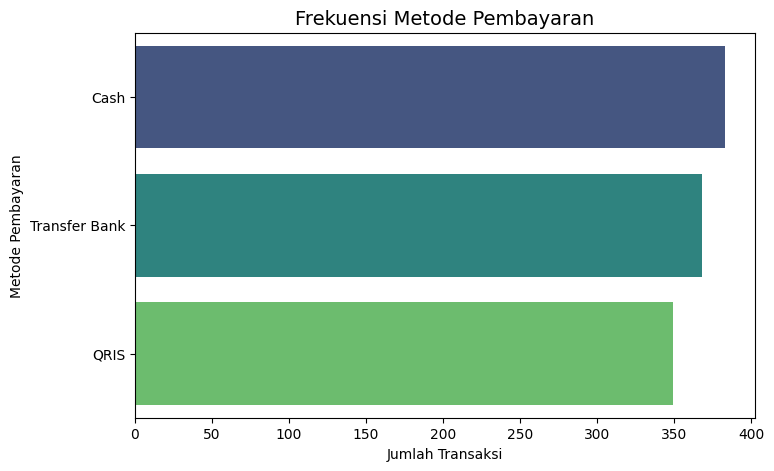

In [10]:
# Plot 3: Payment method frequency
plt.figure(figsize=(8, 5))
sns.countplot(y=data['Metode Pembayaran'], palette="viridis", order=data['Metode Pembayaran'].value_counts().index)
plt.title("Frekuensi Metode Pembayaran", fontsize=14)
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Metode Pembayaran")
plt.show()

<Figure size 1200x600 with 0 Axes>

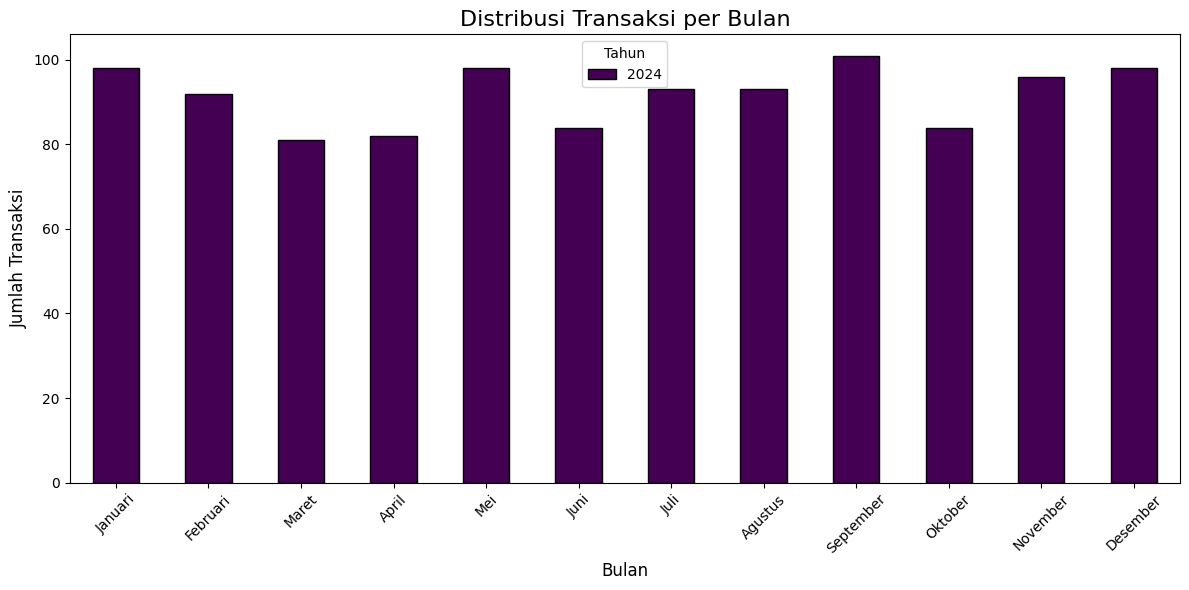

In [11]:
# Convert 'Tanggal Transaksi' to datetime format
data['Tanggal Transaksi'] = pd.to_datetime(data['Tanggal Transaksi'])

# Extract month and year for grouping
data['bulan'] = data['Tanggal Transaksi'].dt.month
data['tahun'] = data['Tanggal Transaksi'].dt.year

# Group by month and count transactions
monthly_transactions = data.groupby(['tahun', 'bulan']).size().reset_index(name='jumlah_transaksi')

# Pivot for better visualization
monthly_pivot = monthly_transactions.pivot(index='bulan', columns='tahun', values='jumlah_transaksi')

# Plot the distribution of transactions per month
plt.figure(figsize=(12, 6))
monthly_pivot.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title('Distribusi Transaksi per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=[
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
], rotation=45)
plt.legend(title='Tahun')
plt.tight_layout()
plt.show()


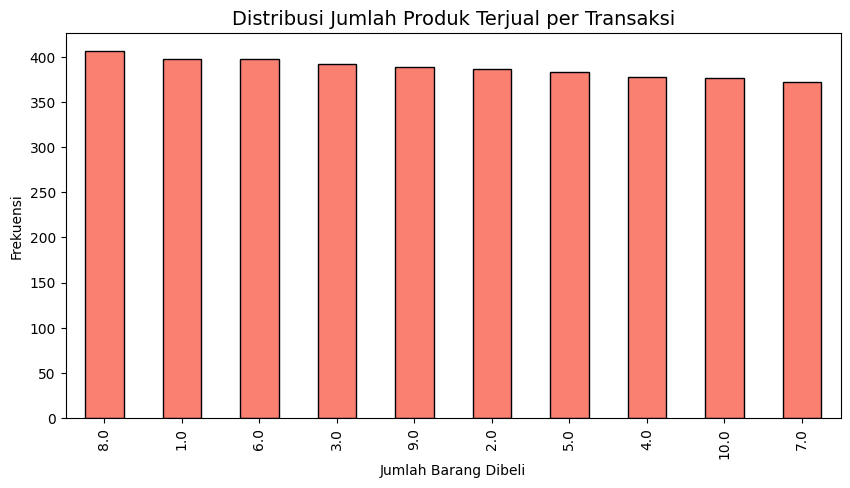

In [12]:
# # Exploratory Data Analysis
# # Plot 1: Distribution of 'Jumlah Barang Dibeli'
# all_jumlah_barang_dibeli = pd.concat([data['Jumlah Barang Dibeli 1'], data['Jumlah Barang Dibeli 2'], data['Jumlah Barang Dibeli 3'], data['Jumlah Barang Dibeli 4'],data['Jumlah Barang Dibeli 5']])
# category_counts = all_jumlah_barang_dibeli.value_counts()

# plt.figure(figsize=(10, 5))
# category_counts.plot(kind='bar', color='salmon', edgecolor='black')
# plt.title("Distribusi Jumlah Produk Terjual per Transaksi", fontsize=14)
# plt.xlabel("Jumlah Barang Dibeli")
# plt.ylabel("Frekuensi")
# plt.show()

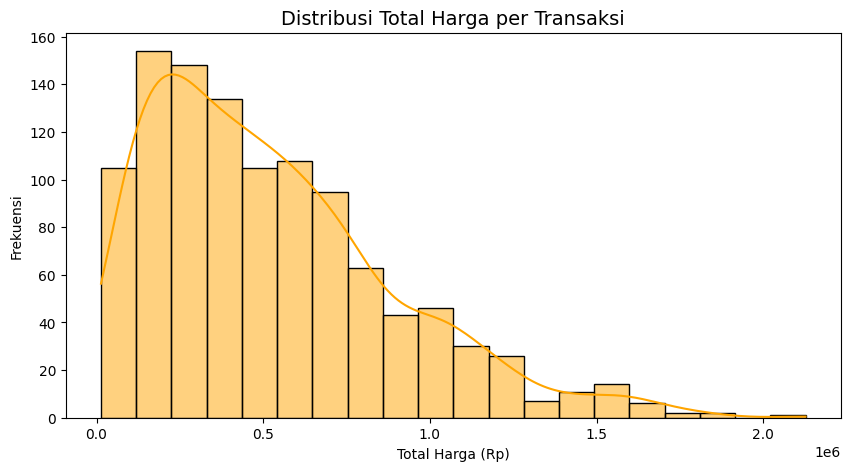

In [13]:
# # Plot 2: Distribution of 'total_harga'
# plt.figure(figsize=(10, 5))
# sns.histplot(data['Total Harga Transaksi'], bins=20, kde=True, color="orange")
# plt.title("Distribusi Total Harga per Transaksi", fontsize=14)
# plt.xlabel("Total Harga (Rp)")
# plt.ylabel("Frekuensi")
# plt.show()

In [14]:
# Detecting outliers using IQR
# Outliers in 'Total Harga Transaksi'
q1_harga, q3_harga = data['Total Harga Transaksi'].quantile([0.25, 0.75])
iqr_harga = q3_harga - q1_harga
outlier_harga = data[
    (data['Total Harga Transaksi'] < (q1_harga - 1.5 * iqr_harga)) | (data['Total Harga Transaksi'] > (q3_harga + 1.5 * iqr_harga))
]

# Display results
print("Jumlah Transaksi dengan Outlier pada 'Total Harga Transaksi':", len(outlier_harga))


Jumlah Transaksi dengan Outlier pada 'Total Harga Transaksi': 26


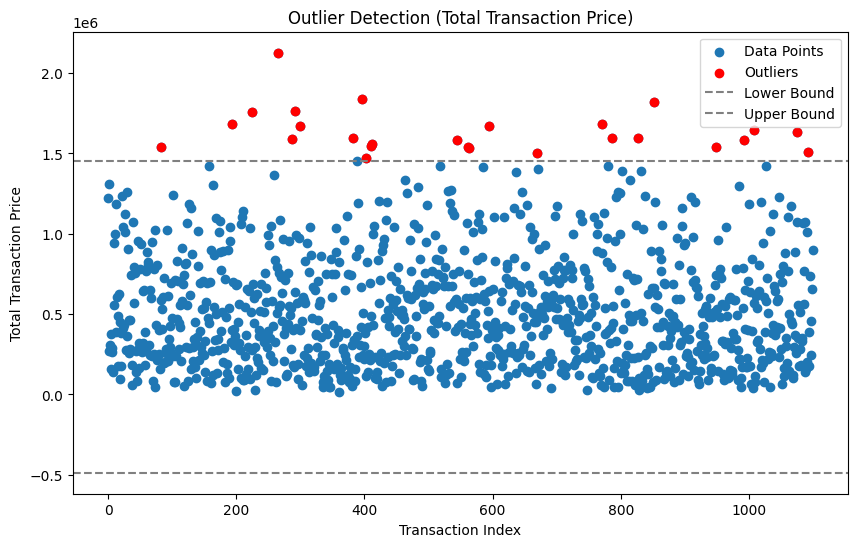

In [15]:
# Visualize outlier detection
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Total Harga Transaksi'], label='Data Points')
plt.scatter(outlier_harga.index, outlier_harga['Total Harga Transaksi'], color='red', label='Outliers')

# Calculate the IQR for 'Total Harga Transaksi'
Q1 = data['Total Harga Transaksi'].quantile(0.25)
Q3 = data['Total Harga Transaksi'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.axhline(y=lower_bound, color='gray', linestyle='dashed', label='Lower Bound')
plt.axhline(y=upper_bound, color='gray', linestyle='dashed', label='Upper Bound')

plt.xlabel('Transaction Index')
plt.ylabel('Total Transaction Price')
plt.title('Outlier Detection (Total Transaction Price)')
plt.legend()
plt.show()

DATA PREPARATION

In [18]:
# Fill missing values with 0
data.fillna(0, inplace=True)
data.head()

,ID Transaksi,Tanggal Transaksi,Metode Pembayaran,Nama Barang 1,Kategori Barang 1,Jumlah Barang Dibeli 1,Harga Barang 1,Nama Barang 2,Kategori Barang 2,Jumlah Barang Dibeli 2,...,Harga Barang 3,Nama Barang 4,Kategori Barang 4,Jumlah Barang Dibeli 4,Harga Barang 4,Nama Barang 5,Kategori Barang 5,Jumlah Barang Dibeli 5,Harga Barang 5,Total Harga Transaksi
0,AgPeeLTL,2024-03-02,Cash,Life Cat Pouch Dus,Makanan Kucing,7,108000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,1,...,20000.0,Life Cat Tofu - Macha,Makanan Kucing,4.0,55833.0,Life Cat Tofu - Mango,Makanan Kucing,1.0,55833.0,1219665
1,X3ih6KPj,2024-09-19,Transfer Bank,Life Cat Pouch Dus,Makanan Kucing,7,108000,Makanan Anjing Purina,Makanan Anjing,2,...,4435.0,Makanan Kucing Whiskas,Makanan Kucing,7.0,45000.0,Life Cat Can - Chicken & Salmon,Makanan Kucing,10.0,12000.0,1308740
2,yJhNjYUP,2024-06-15,Cash,Makanan Anjing Purina,Makanan Anjing,5,50000,Life Cat Pouch - Salmon Adult,Makanan Kucing,5,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,272265
3,JSEmCzSj,2024-05-25,Transfer Bank,Makanan Ikan Gupi,Makanan Ikan,4,35000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,6,...,4435.0,Life Cat Can - Kitten Tuna,Makanan Kucing,8.0,12000.0,Mainan Anjing Kong,Mainan Anjing,1.0,20000.0,305175
4,31sF5GKo,2024-02-27,Transfer Bank,Life Cat Can - Kitten Tuna,Makanan Kucing,7,12000,Mainan Anjing Kong,Mainan Anjing,4,...,12024.0,Life Cat Can - Tuna,Makanan Kucing,6.0,11000.0,Life Cat Pouch - Salmon Adult,Makanan Kucing,9.0,4453.0,378293
